In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings

from pathlib import Path

#Configurations
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

## Directories and Filenames
Contains paths and filenames to access test and training data.

In [112]:
ROOT_DIR = Path.cwd().parent
SRC_DIR = os.path.join(ROOT_DIR, 'src')
DATA_DIR = os.path.join(ROOT_DIR, 'data')

training_data_path = os.path.join(DATA_DIR, 'TrainOnMe.csv')
test_data_path = os.path.join(DATA_DIR, 'PredictOnMe.csv')

# Load data
df_train = pd.read_csv(training_data_path, index_col=0)
df_test = pd.read_csv(test_data_path, index_col=0)

# Exploratory data analysis and visualization

Outputting descriptive statistics, plotting individual feature distributions and looking at target distribution.

In [113]:
df_train.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,Jorg,-0.21695,0.88123,-4.95144,-2.37890,2.18407,0.84635,Slängpolskor,1.70754,0.44414,-9.29924,-1.26958,True,-3.56049
1,Atsuto,-1.74145,0.02792,1.18805,-2.13850,1.94884,0.18559,Hambo,-0.42399,-0.54993,-8.93621,1.11524,True,-8.11321
2,Bob,0.82878,-0.29430,3.98977,-2.15388,2.09048,-0.26580,Schottis,1.23020,0.10881,-10.99470,-2.01507,True,6.13878
3,Jorg,-0.45922,1.38967,0.32138,-2.25580,2.04402,1.42847,Slängpolskor,-1.21911,-0.84549,-8.80555,-0.92500,True,-2.13542
4,Bob,0.89319,-1.01451,-2.80611,-1.90744,1.69157,-1.40292,Schottis,-1.93778,1.55950,-8.23288,-2.02836,True,3.06292


In [114]:
df_train.describe(include='all')

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
count,1001,1.000000e+03,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,999,999.000000
unique,4,NaN,NaN,NaN,999,NaN,NaN,7,NaN,NaN,NaN,NaN,4,NaN
top,Jorg,NaN,NaN,NaN,-2.79552,NaN,NaN,Slängpolskor,NaN,NaN,NaN,NaN,True,NaN
freq,529,NaN,NaN,NaN,2,NaN,NaN,273,NaN,NaN,NaN,NaN,770,NaN
mean,NaN,1.000008e+03,0.003509,-1.004263,NaN,2.111913,-0.018157,NaN,0.031468,0.004381,-8.868640,-0.346683,NaN,-0.468022
std,NaN,3.162279e+04,0.736143,3.394955,NaN,0.419266,0.881752,NaN,1.364587,1.399432,1.565727,1.965642,NaN,4.870830
min,NaN,-3.125150e+00,-2.186940,-10.703420,NaN,1.176050,-2.706360,NaN,-4.591310,-4.652330,-13.583960,-5.984310,NaN,-17.934910
25%,NaN,-6.998100e-01,-0.520195,-3.277675,NaN,1.802773,-0.639948,NaN,-0.797835,-0.863465,-9.892152,-1.775378,NaN,-3.686750
50%,NaN,-7.160000e-03,-0.013095,-1.004120,NaN,2.110670,-0.040755,NaN,0.014830,0.054955,-8.822295,-0.724980,NaN,-0.596770
75%,NaN,7.200775e-01,0.510320,1.345555,NaN,2.402317,0.565360,NaN,0.909220,0.818815,-7.838750,0.923335,NaN,2.950720


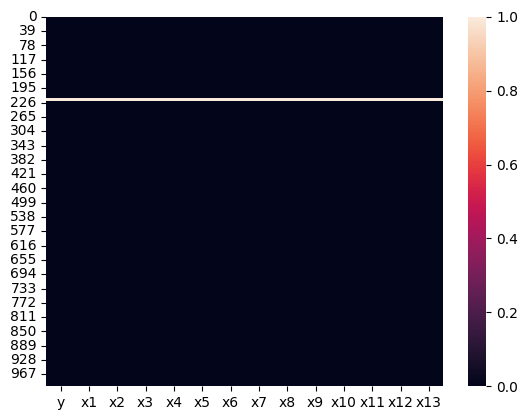

In [115]:
sns.heatmap(df_train.isnull())
df_train.dropna(inplace=True)

# Data Cleaning, Preprocessing and Normalization

Applying different column transformations to categorical and numerical features

In [116]:
#Manually clean up datatypes and find missing data
df_train.dtypes
df_train['x4'].value_counts()
df_train.replace('?', np.nan, inplace=True)
df_test.replace('?', np.nan, inplace=True)

#Converting x12 to clean boolean
bool_map = {'False': False, 'True': True, 'NOPE False': False, 'Nope False': False, 'YEP True': True, 'Yep True': True}
df_train['x12'] = df_train['x12'].map(bool_map)

#Removing x7 typos
df_train['x7'].replace('chottis', 'Schottis', inplace=True)
df_test['x7'].replace('chottis', 'Schottis', inplace=True)
df_train['x7'].replace('olka', 'Polka', inplace=True)
df_test['x7'].replace('olka', 'Polka', inplace=True)

#Convert x4 to numeric
df_train['x4'] = pd.to_numeric(df_train['x4'])
df_test['x4'] = pd.to_numeric(df_test['x4'])

In [117]:
#Define categorical and numerical columns
target = 'y'
categorical_features = df_train.drop(target, axis = 1).select_dtypes(include=['object', 'bool']).columns
numerical_features = df_train.drop(target, axis = 1).select_dtypes(include='number').columns

In [118]:
categorical_features

Index(['x7', 'x12'], dtype='object')

In [119]:
#Get rows containing outlier values
def get_outlier_rows(df, columns):
    outlier_rows = []
    lower = df[columns].quantile(0.25)
    upper = df[columns].quantile(0.75)
    iqr = upper - lower
    outlier_rows = df[~((df[columns] >= (lower - 2 * iqr)) & (df[columns] <= (upper + 2 * iqr))).all(axis=1)]
    return outlier_rows

#Filter outlier rows
outlier_rows_train = get_outlier_rows(df_train, numerical_features)
df_train.drop(outlier_rows_train.index, inplace=True)

outlier_rows_test = get_outlier_rows(df_test, numerical_features)
#df_test.drop(outlier_rows_test.index, inplace=True)

In [120]:
#Define missing value column transformers 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

standard_scaler = StandardScaler()
categorical_imputer = SimpleImputer(strategy='most_frequent')
numerical_imputer = SimpleImputer(strategy='median')

numeric_transformer = Pipeline(steps=[
    ('imputer', numerical_imputer),
    ('scaler', standard_scaler)
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False, handle_unknown='ignore', drop='if_binary')),
    ('imputer', categorical_imputer)
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numerical_features)
    ],
    verbose_feature_names_out=False
    )

preprocessor.set_output(transform='pandas')

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse=False)),
                                                 ('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 Index(['x7', 'x12'], dtype='object')),
                                ('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x8', 'x9', 'x10', 'x11', 'x13'], dtype='object'))],
                  verbose_feature_names_out=False)

In [121]:
numeric_transformer.fit_transform(df_train[numerical_features])

,x1,x2,x3,x4,x5,x6,x8,x9,x10,x11,x13
0,-0.217610,1.198357,-1.172690,0.041297,0.168716,0.987879,1.243974,0.323734,-0.275316,-0.462594,-0.640260
1,-1.723374,0.037146,0.639590,0.505788,-0.394709,0.235030,-0.343594,-0.401810,-0.042394,0.763768,-1.584218
2,0.815268,-0.401341,1.466614,0.476071,-0.055452,-0.279269,0.888450,0.078986,-1.363136,-0.845952,1.370782
3,-0.456902,1.890258,0.383763,0.279145,-0.166733,1.651127,-0.935800,-0.617531,0.041439,-0.285398,-0.344786
4,0.878887,-1.381426,-0.539423,0.952232,-1.010925,-1.574866,-1.471067,1.137805,0.408868,-0.852787,0.733035
...,...,...,...,...,...,...,...,...,...,...,...
995,1.582383,1.798389,-0.172075,1.108505,-1.093847,1.688749,-0.572717,-1.300137,0.378751,-0.789679,1.600432
996,-1.989690,0.619228,-1.254757,-2.349557,2.158297,0.801501,-1.550173,-1.361111,1.702760,-1.055401,-2.529046
997,0.176329,-0.300041,-0.837632,-0.037980,-0.222254,-0.535661,0.181797,2.223169,0.774835,0.041409,-0.109106
998,-0.243083,0.137997,-0.158175,-1.892292,1.736021,0.054873,0.073280,-1.207721,-0.715786,-1.172796,-0.310693


In [122]:
#Fit and transform training data
df_train_target = df_train[target]
df_train = preprocessor.fit_transform(df_train)
df_train['y'] = df_train_target
df_test = preprocessor.transform(df_test)

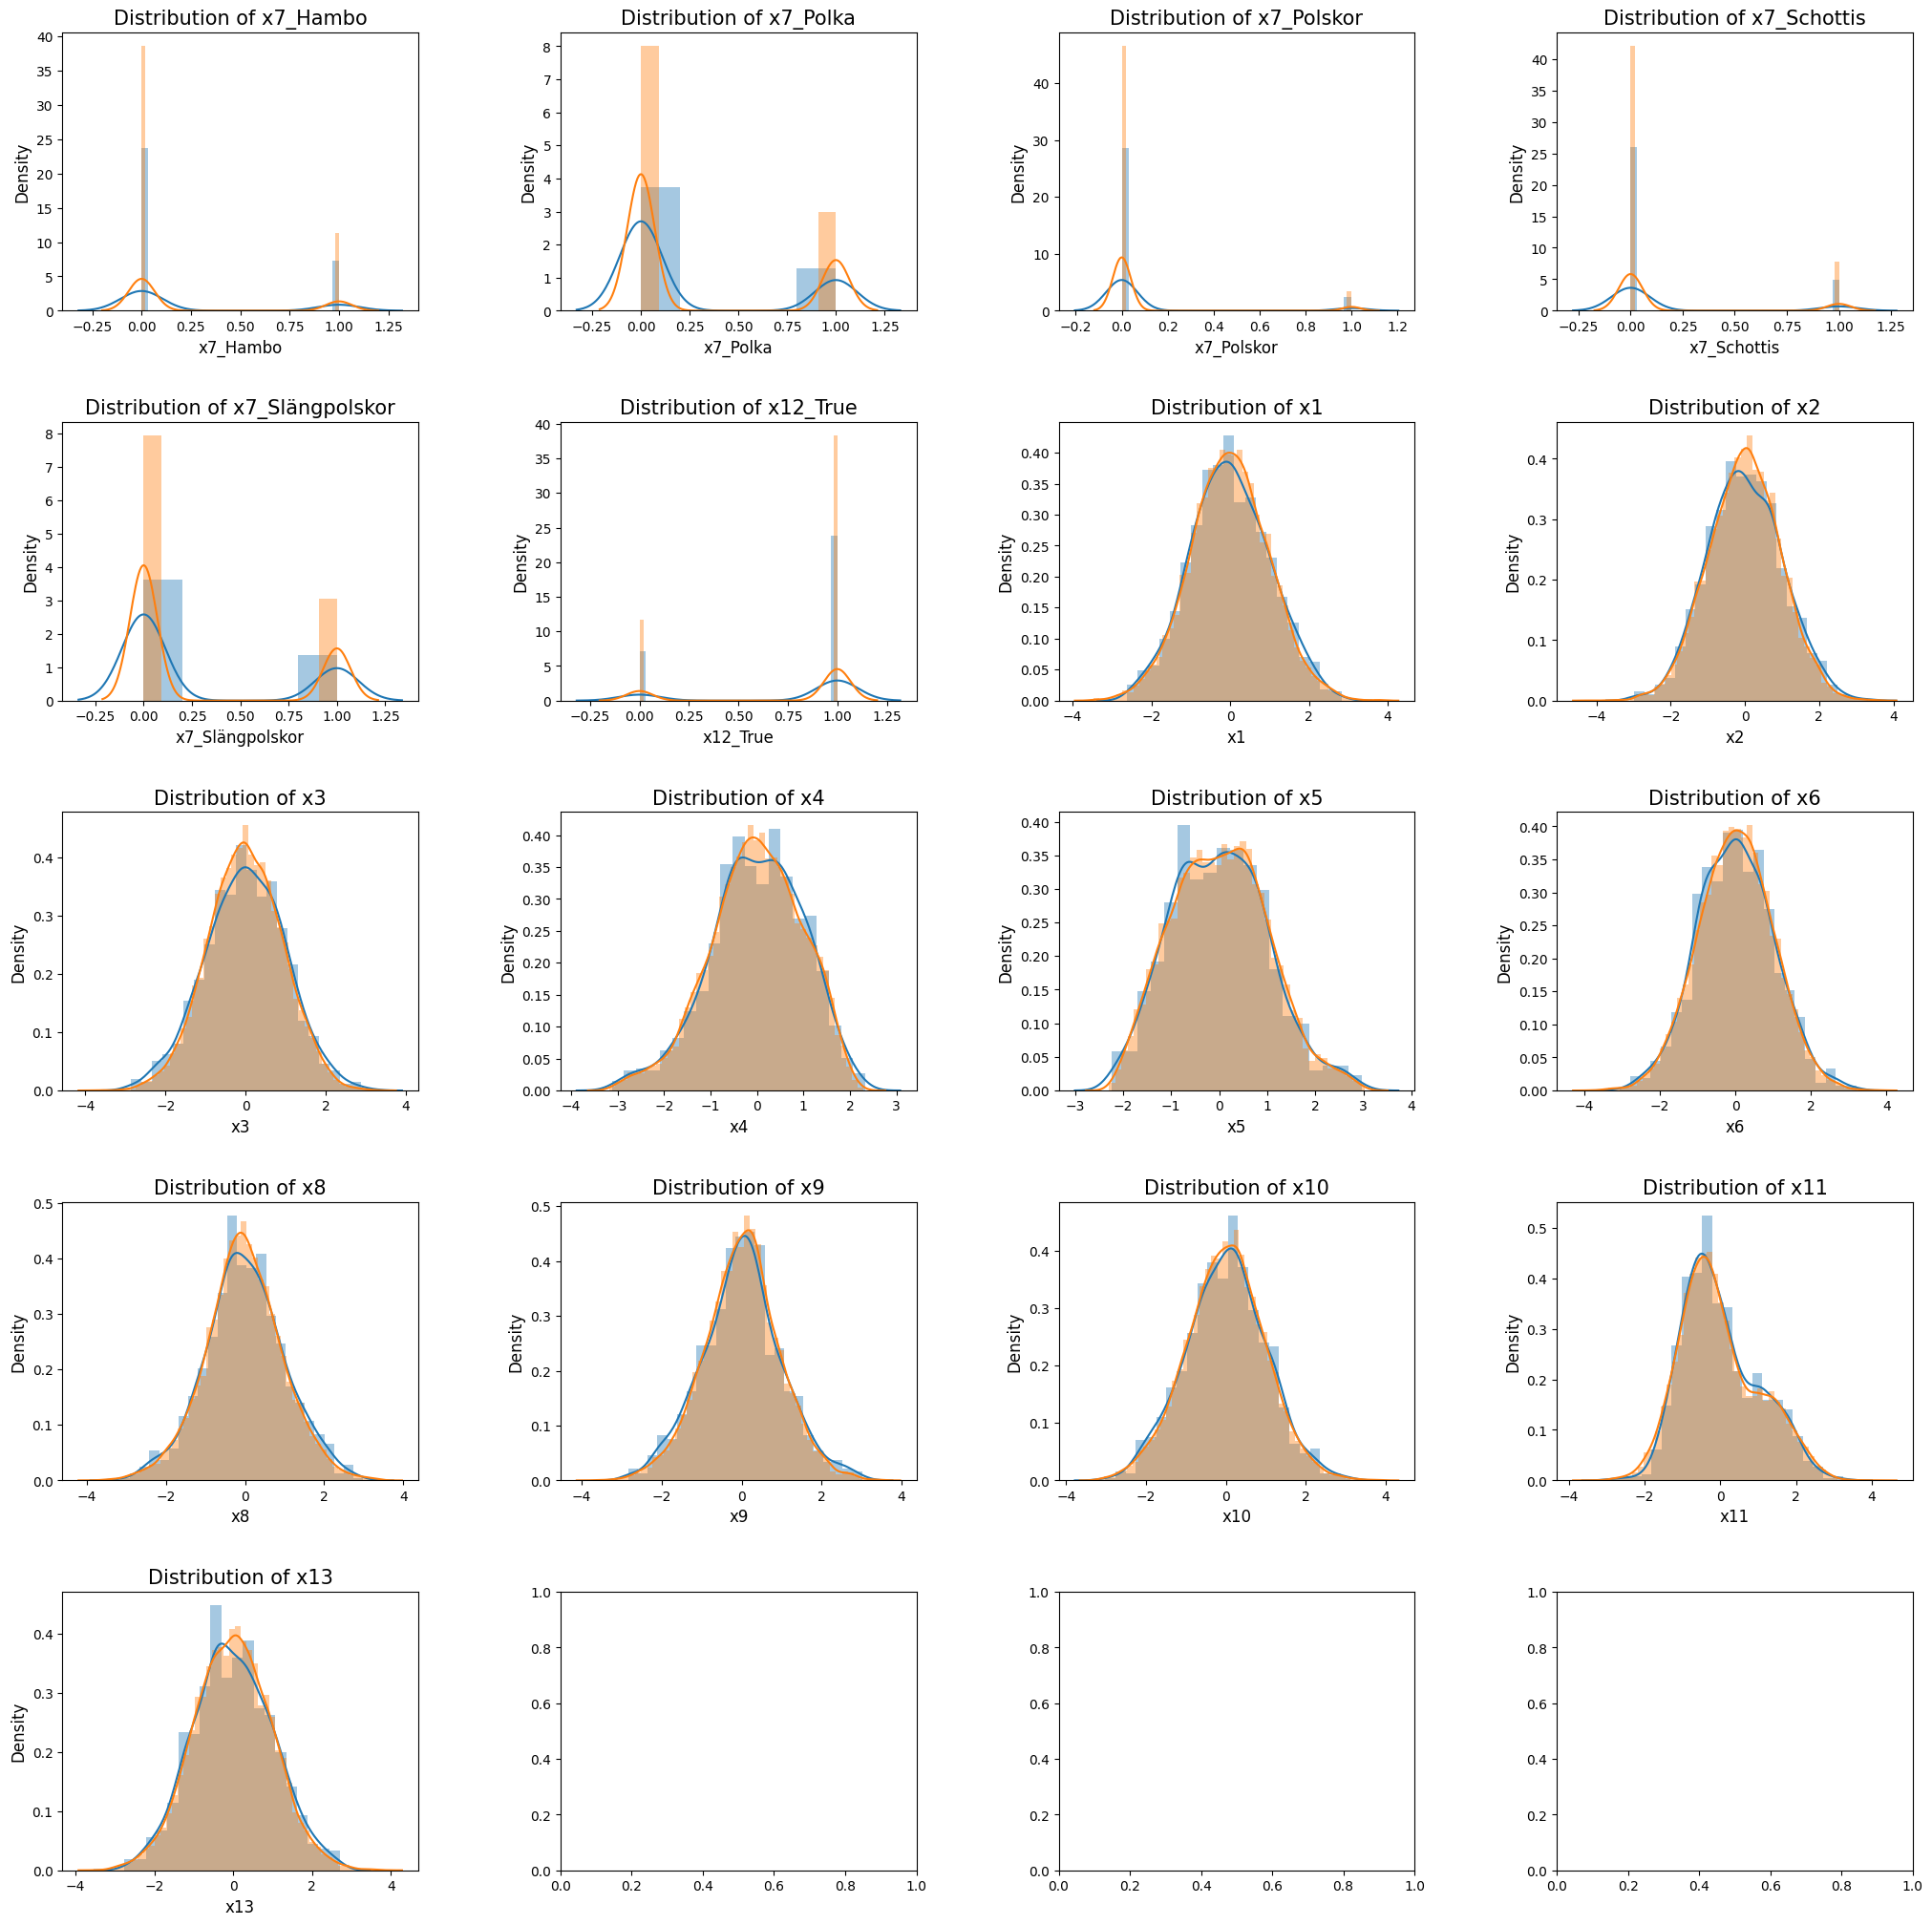

In [123]:
def plot_numeric_column_distributions(df, df2, features):
    fig, ax = plt.subplots(5, 4, figsize=(25, 25))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for i, ax in enumerate(fig.axes):
        if i < len(features):
            sns.distplot(df[features[i]], ax=ax)
            sns.distplot(df2[features[i]], ax=ax)
            ax.set_xlabel(features[i], fontsize=12)
            ax.set_ylabel("Density", fontsize=12)
            ax.set_title("Distribution of " + features[i], fontsize=15)
    plt.show()

plot_numeric_column_distributions(df_train, df_test, df_train.drop('y', axis=1).columns)

<Axes: xlabel='y', ylabel='Count'>

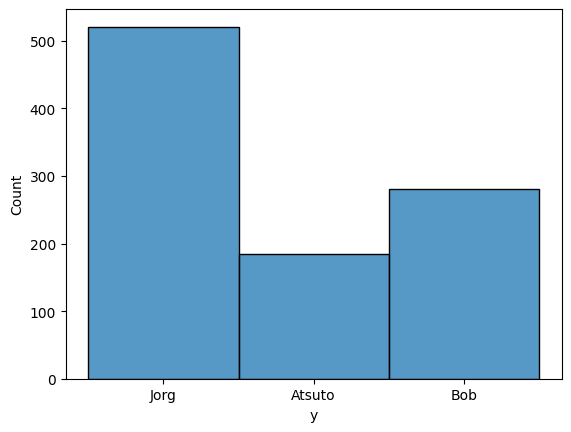

In [124]:
sns.histplot(df_train['y'])

In [125]:
df_train.describe()

,x7_Hambo,x7_Polka,x7_Polskor,x7_Schottis,x7_Slängpolskor,x12_True,x1,x2,x3,x4,x5,x6,x8,x9,x10,x11,x13
count,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,9.870000e+02,9.870000e+02,9.870000e+02,9.870000e+02,9.870000e+02,9.870000e+02,9.870000e+02,9.870000e+02,9.870000e+02,9.870000e+02,9.870000e+02
mean,0.233029,0.255319,0.079027,0.159068,0.273556,0.771023,7.199015e-18,3.149569e-18,4.499384e-18,7.019039e-16,4.391399e-16,2.699630e-18,2.879606e-17,1.799754e-17,-6.537605e-16,-2.069717e-17,-5.399261e-18
std,0.422975,0.436262,0.269918,0.365925,0.446010,0.420387,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00,1.000507e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.621311e+00,-2.976906e+00,-2.870583e+00,-3.128005e+00,-2.245704e+00,-3.059963e+00,-3.157835e+00,-2.834629e+00,-3.024425e+00,-2.887081e+00,-2.761073e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-6.945847e-01,-7.093521e-01,-6.739897e-01,-6.287569e-01,-7.390687e-01,-7.056373e-01,-6.192038e-01,-6.323402e-01,-6.543750e-01,-7.286447e-01,-6.687294e-01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.637365e-02,-2.191437e-02,2.092754e-03,3.594442e-02,-1.704312e-04,-2.188583e-02,-1.756389e-02,3.787988e-02,3.200721e-02,-1.962916e-01,-2.696383e-02
75%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,7.008865e-01,6.769340e-01,6.877318e-01,7.249716e-01,6.921769e-01,6.615979e-01,6.472054e-01,5.824743e-01,6.576452e-01,6.505583e-01,7.097715e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.824912e+00,3.317444e+00,3.154202e+00,2.325669e+00,2.973051e+00,3.205384e+00,2.986923e+00,3.011753e+00,3.125159e+00,3.238356e+00,2.705794e+00


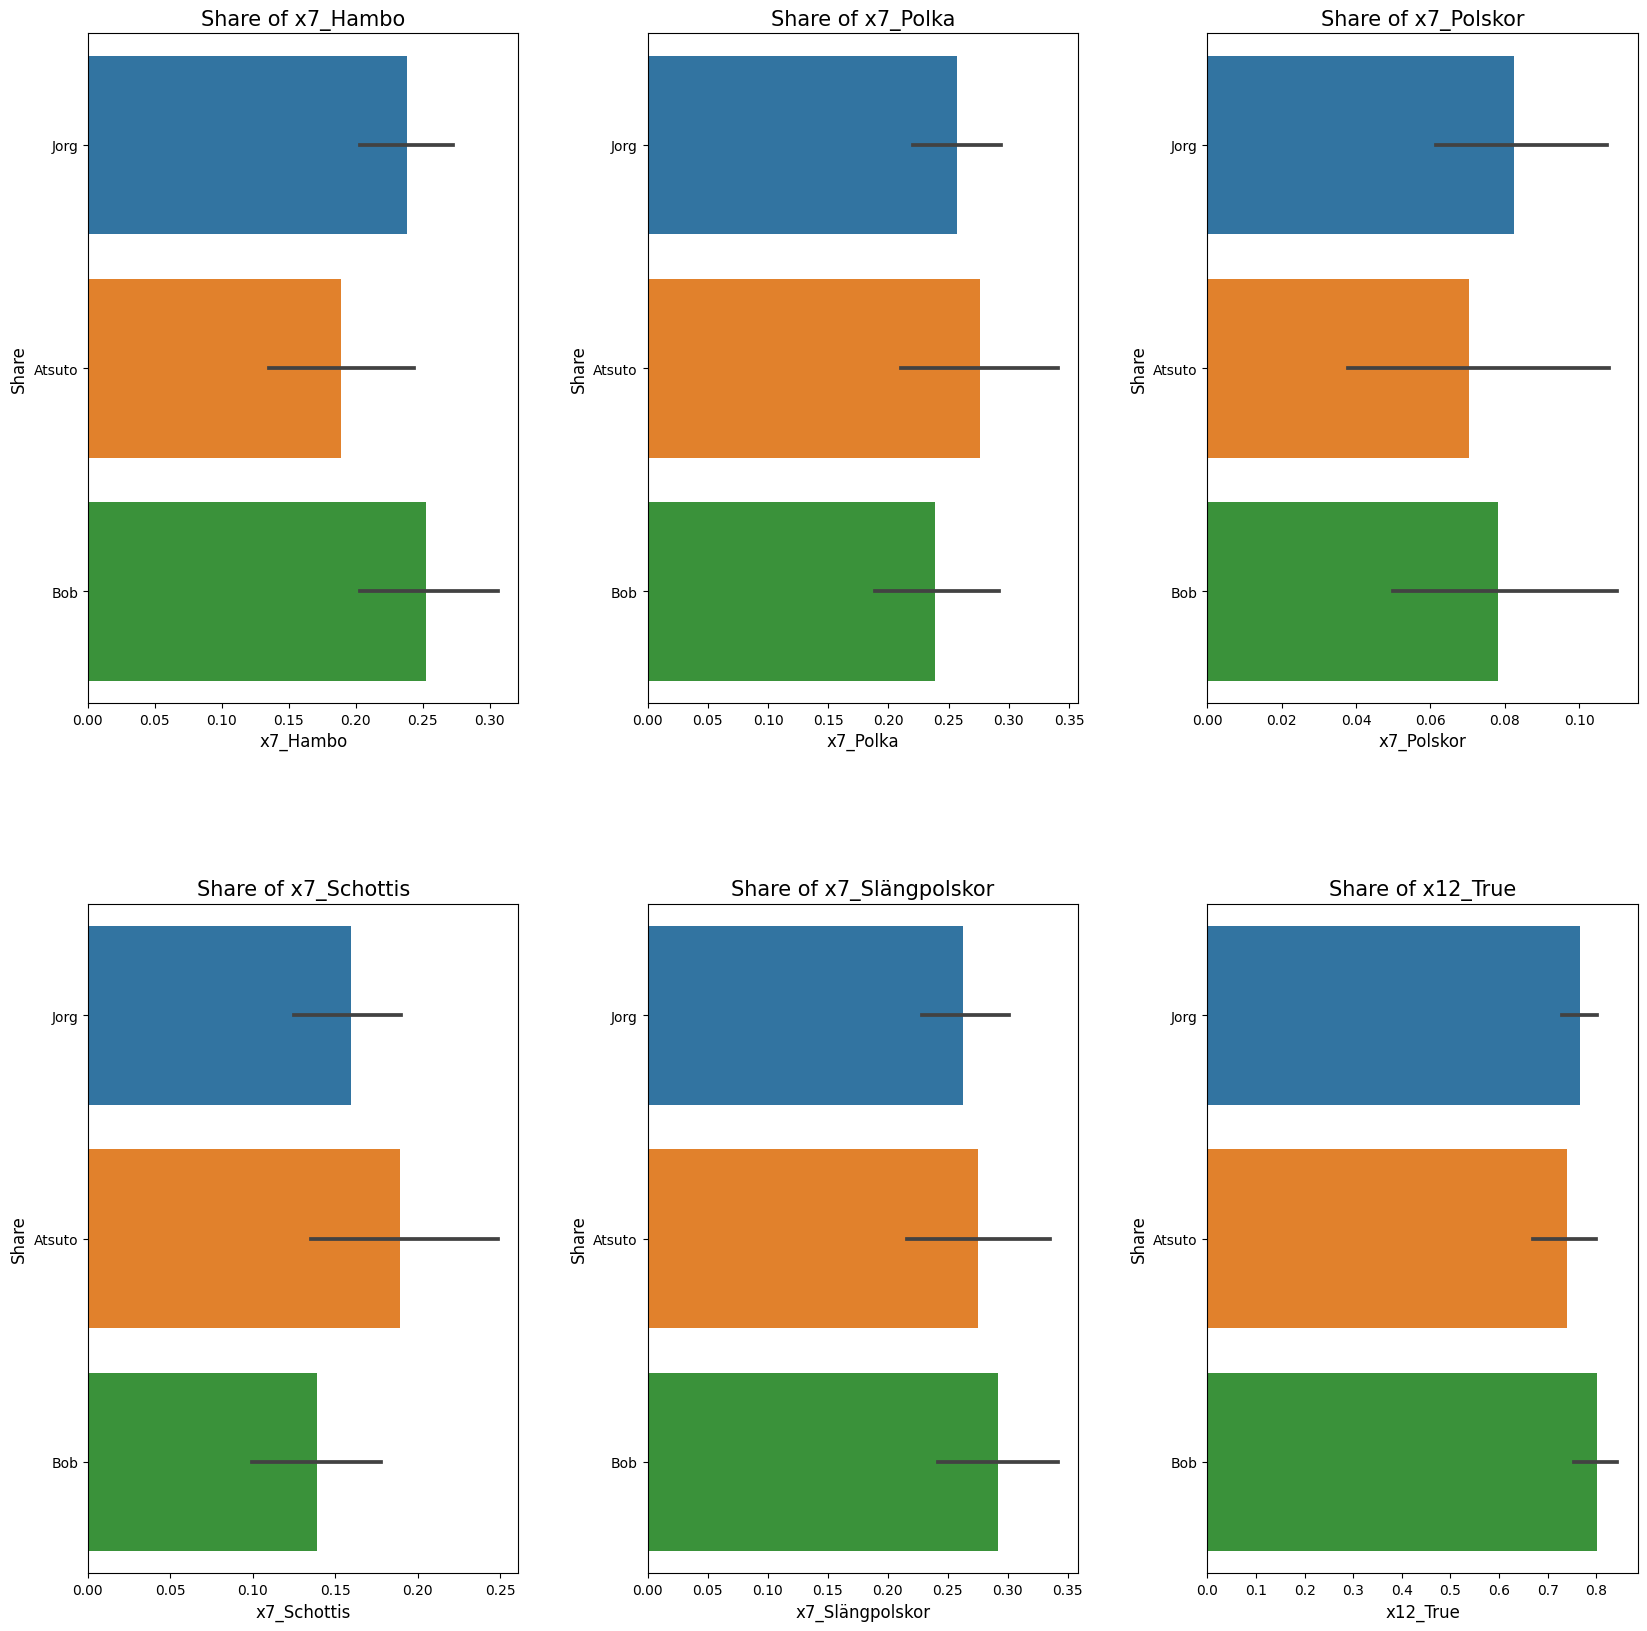

In [126]:
#Plot share of target variable across all one hot encoded features
def plot_categorical_column_distributions(df, features):
    fig, ax = plt.subplots(2, 3, figsize=(20, 20))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(fig.axes):
        if i < len(features):
            sns.barplot(x=features[i], y='y', data=df, ax=ax)
            ax.set_xlabel(features[i], fontsize=12)
            ax.set_ylabel("Share", fontsize=12)
            ax.set_title("Share of " + features[i], fontsize=15)
    plt.show()

one_hot_features = [col for col in df_train.columns if col not in numerical_features and col not in categorical_features and col != 'y']
plot_categorical_column_distributions(df_train, one_hot_features)

<Axes: xlabel='y', ylabel='Count'>

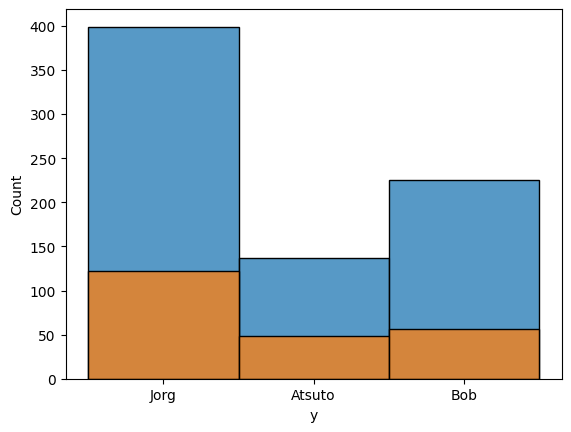

In [127]:
#Plot bar histogram of y across all values of x12_True
sns.histplot(df_train[df_train['x12_True'] == 1]['y'], legend=True)
sns.histplot(df_train[df_train['x12_True'] == 0]['y'], legend=True)

In [128]:
df_train

,x7_Hambo,x7_Polka,x7_Polskor,x7_Schottis,x7_Slängpolskor,x12_True,x1,x2,x3,x4,x5,x6,x8,x9,x10,x11,x13,y
0,0.0,0.0,0.0,0.0,1.0,1.0,-0.217610,1.198357,-1.172690,0.041297,0.168716,0.987879,1.243974,0.323734,-0.275316,-0.462594,-0.640260,Jorg
1,1.0,0.0,0.0,0.0,0.0,1.0,-1.723374,0.037146,0.639590,0.505788,-0.394709,0.235030,-0.343594,-0.401810,-0.042394,0.763768,-1.584218,Atsuto
2,0.0,0.0,0.0,1.0,0.0,1.0,0.815268,-0.401341,1.466614,0.476071,-0.055452,-0.279269,0.888450,0.078986,-1.363136,-0.845952,1.370782,Bob
3,0.0,0.0,0.0,0.0,1.0,1.0,-0.456902,1.890258,0.383763,0.279145,-0.166733,1.651127,-0.935800,-0.617531,0.041439,-0.285398,-0.344786,Jorg
4,0.0,0.0,0.0,1.0,0.0,1.0,0.878887,-1.381426,-0.539423,0.952232,-1.010925,-1.574866,-1.471067,1.137805,0.408868,-0.852787,0.733035,Bob
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,1.0,0.0,0.0,0.0,1.582383,1.798389,-0.172075,1.108505,-1.093847,1.688749,-0.572717,-1.300137,0.378751,-0.789679,1.600432,Jorg
996,1.0,0.0,0.0,0.0,0.0,1.0,-1.989690,0.619228,-1.254757,-2.349557,2.158297,0.801501,-1.550173,-1.361111,1.702760,-1.055401,-2.529046,Bob
997,0.0,1.0,0.0,0.0,0.0,1.0,0.176329,-0.300041,-0.837632,-0.037980,-0.222254,-0.535661,0.181797,2.223169,0.774835,0.041409,-0.109106,Jorg
998,0.0,0.0,0.0,0.0,1.0,1.0,-0.243083,0.137997,-0.158175,-1.892292,1.736021,0.054873,0.073280,-1.207721,-0.715786,-1.172796,-0.310693,Bob


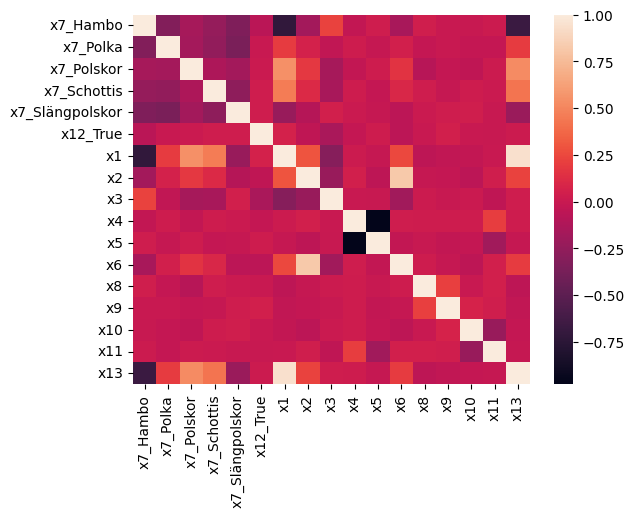

In [129]:
sns.heatmap(df_train.drop('y', axis = 1).corr())
df_train.drop(['x13', 'x2', 'x4'], axis = 1, inplace=True)

In [130]:
from sklearn.preprocessing import LabelEncoder

#Encode target variable
le = LabelEncoder()
df_train['y'] = le.fit_transform(df_train['y'])
df_train['y'].value_counts()

y
2    521
1    281
0    185
Name: count, dtype: int64

In [131]:
#Write processed test and train data to datapath as csv
df_train.to_csv(os.path.join(DATA_DIR, 'train_processed.csv'), index=False)
df_test.to_csv(os.path.join(DATA_DIR, 'test_processed.csv'), index=False)